# Ken Jee - Youtube metrics EDA 

## Import all the libraries

In [1]:
!pip install wordcloud
!pip install itables
!pip install country-converter

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting the data 
import plotly.express as px
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

from itables import init_notebook_mode,show
init_notebook_mode(all_interactive=True)
import itables.options as opt

opt.lengthMenu = [2, 5, 10, 20, 50, 100, 200, 500]

import warnings
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>

## Read the Dataset

In [3]:
country_metrics =pd.read_csv("Aggregated_Metrics_By_Country_And_Subscriber_Status.csv")

In [4]:
video_metrics = pd.read_csv("Aggregated_Metrics_By_Video.csv")

In [5]:
comments = pd.read_csv("All_Comments_Final.csv")

In [6]:
video_performance= pd.read_csv("Video_Performance_Over_Time.csv")

# Aggregated Metrics By Video

In [7]:
video_metrics.columns = ['Video','Video title','Video publish time','Comments added','Shares','Dislikes','Likes',
                      'Subscribers lost','Subscribers gained','RPM(USD)','CPM(USD)','Average % viewed','Average view duration',
                      'Views','Watch time (hours)','Subscribers','Your estimated revenue (USD)','Impressions','Impressions ctr(%)']
   

In [8]:
print("Number of Rows",video_metrics.shape[0])
print("Number of Columns",video_metrics.shape[1])

Number of Rows 224
Number of Columns 19


In [9]:
video_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Video                         224 non-null    object 
 1   Video title                   223 non-null    object 
 2   Video publish time            223 non-null    object 
 3   Comments added                224 non-null    int64  
 4   Shares                        224 non-null    int64  
 5   Dislikes                      224 non-null    int64  
 6   Likes                         224 non-null    int64  
 7   Subscribers lost              224 non-null    int64  
 8   Subscribers gained            224 non-null    int64  
 9   RPM(USD)                      224 non-null    float64
 10  CPM(USD)                      222 non-null    float64
 11  Average % viewed              224 non-null    float64
 12  Average view duration         224 non-null    object 
 13  Views

In [10]:
video_metrics.isnull().sum()

Video                           0
Video title                     1
Video publish time              1
Comments added                  0
Shares                          0
Dislikes                        0
Likes                           0
Subscribers lost                0
Subscribers gained              0
RPM(USD)                        0
CPM(USD)                        2
Average % viewed                0
Average view duration           0
Views                           0
Watch time (hours)              0
Subscribers                     0
Your estimated revenue (USD)    0
Impressions                     0
Impressions ctr(%)              0
dtype: int64

In [11]:
video_metrics.duplicated().sum()

0

The data contains 224 Rows and 19 Columns. We can see that first row is summarized as Total. Hence there is one missing value in Video title and Video publish time

In [12]:
new_video_metrics=video_metrics.iloc[1:,:]

In [13]:
show(
    new_video_metrics,
    columnDefs=[{"width": "120px", "targets": "_all"}],
    tags="<caption>Aggregate Data By Video</caption>"
)

In [14]:
new_video_metrics.isnull().sum()

Video                           0
Video title                     0
Video publish time              0
Comments added                  0
Shares                          0
Dislikes                        0
Likes                           0
Subscribers lost                0
Subscribers gained              0
RPM(USD)                        0
CPM(USD)                        2
Average % viewed                0
Average view duration           0
Views                           0
Watch time (hours)              0
Subscribers                     0
Your estimated revenue (USD)    0
Impressions                     0
Impressions ctr(%)              0
dtype: int64

### Checking null rows

In [15]:
show(
    new_video_metrics[new_video_metrics['CPM(USD)'].isnull()],
    columnDefs=[{"width": "120px", "targets": "_all"}],
    tags="<caption>Aggregate Data By Video</caption>"
)

#### Cost per 1,000 impressions (CPM) is a metric that represents how much money advertisers are spending to show ads on YouTube.

In [16]:
#There are 2 missing values in CPM variable. We will replace it by 0.
new_video_metrics.fillna(0, inplace=True)

In [17]:
new_video_metrics.isnull().sum()

Video                           0
Video title                     0
Video publish time              0
Comments added                  0
Shares                          0
Dislikes                        0
Likes                           0
Subscribers lost                0
Subscribers gained              0
RPM(USD)                        0
CPM(USD)                        0
Average % viewed                0
Average view duration           0
Views                           0
Watch time (hours)              0
Subscribers                     0
Your estimated revenue (USD)    0
Impressions                     0
Impressions ctr(%)              0
dtype: int64

In [18]:
new_video_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 1 to 223
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Video                         223 non-null    object 
 1   Video title                   223 non-null    object 
 2   Video publish time            223 non-null    object 
 3   Comments added                223 non-null    int64  
 4   Shares                        223 non-null    int64  
 5   Dislikes                      223 non-null    int64  
 6   Likes                         223 non-null    int64  
 7   Subscribers lost              223 non-null    int64  
 8   Subscribers gained            223 non-null    int64  
 9   RPM(USD)                      223 non-null    float64
 10  CPM(USD)                      223 non-null    float64
 11  Average % viewed              223 non-null    float64
 12  Average view duration         223 non-null    object 
 13  Views

#### Converting Video publish time feature to appropriate 'Date' datatype from 'object'

#### We will fix the date from Video Publish time and break it down into new features 'Year' and 'Month'

In [19]:
new_video_metrics['Video publish time']=pd.to_datetime(new_video_metrics['Video publish time'])

In [20]:
new_video_metrics['Year'] = new_video_metrics['Video publish time'].dt.year
new_video_metrics['Month'] = new_video_metrics['Video publish time'].dt.month

In [21]:
new_video_metrics["Month_name"]=new_video_metrics["Video publish time"].dt.month_name()

In [22]:
show(
    new_video_metrics,
    columnDefs=[{"width": "120px", "targets": "_all"}],
    tags="<caption>Aggregate Data By Video</caption>"
)

## Total Views,Likes,Dislikes, Subscribers,Shares and Subscribers Lost

In [23]:
total=pd.DataFrame(new_video_metrics[["Views","Likes","Dislikes","Subscribers","Shares","Subscribers lost","Your estimated revenue (USD)"]].sum().reset_index().sort_values(by=0,ascending=False).rename(columns={"index":"Columns",0:"Total"}))

c=total["Columns"]
t=total["Total"]


go_fig = go.Figure()

obj = go.Table(
    header = dict(values=["Columns", "Total"],
                 fill_color = 'Brown',
                 align = 'left',
                 font=dict(color="white", size = 12)),
    cells = dict(values=[c, t],
                 fill_color = 'black',
                 align = 'left', 
                 font=dict(color="white", size = 12)))
go_fig.add_trace(obj)
go_fig.show()

## Number of Videos Published By Year

In [24]:
new_video_metrics['Year'].value_counts().sort_values(ascending = True)

2017      2
2022      4
2018      7
2021     47
2019     50
2020    113
Name: Year, dtype: int64

### Looks Like KenJee's most active year has been 2020

In [25]:
temp=pd.DataFrame(new_video_metrics['Year'].value_counts())

In [26]:
temp.columns = ['No of videos Published'] # `count` is like a keyword name for the feature here
temp['Year'] = temp.index

In [27]:
plt_title = 'Number Of Videos Published By Year'

fig = px.bar(temp, x = 'Year', y = 'No of videos Published')
fig.update_traces(marker_color='cyan')
# template enhancement
fig.update_layout(
    template="plotly_dark",
    title={
        "text": plt_title,
        "font": {"family": "Rockwell", "size": 20},
        "yanchor": "top",
    }
)
fig.show()

#### The number of Videos published in year 2020 is highest with 113 videos followed by 2019 which has 50 published videos.


### Let us check some distributions

In [28]:
def hist_plotter(df, feat,plt_title):
    
   
   
    fig = px.histogram(df, x=feat)
   
    
    # template enhancement
    fig.update_traces(marker_color='blue')    
    fig.update_layout(
        template="plotly_dark",
        title={
            "text": plt_title,
            "font": {"family": "Rockwell", "size": 25},
            "yanchor": "top",
        },
        xaxis_title = feat,
        yaxis_title = "Count"
    )
    
    return fig.show()

In [29]:
def bar_plotter(df,x,y, plt_title):

    fig = px.bar(df,x, y)
    fig.update_traces(marker_color='darkmagenta')
#template enhancement
    fig.update_layout(
    template="plotly_dark",
    title={
        "text": plt_title,
        "font": {"family": "Rockwell", "size": 20},
        "yanchor": "top",
    }
)
    return fig.show()

In [30]:
from plotly.subplots import make_subplots

### Number of Views By Year

In [31]:
temp=new_video_metrics.groupby(["Year"])['Views'].sum().sort_values(ascending=False).reset_index()

In [32]:
bar_plotter(temp,'Year','Views', 'No of Views Per Year')
hist_plotter(new_video_metrics,"Views", "Distribution Of Views")


### Likes 

In [33]:
hist_plotter(new_video_metrics,"Likes", "Distribution Of Likes")

## Dislikes

In [34]:
hist_plotter(new_video_metrics,"Dislikes", "Distribution Of Dislikes")

In [35]:
### Creating a variable for ratio of 'total likes per total views' and 'total dislikes per total views' for all videos

In [36]:
new_video_metrics['%Likes']=(new_video_metrics['Likes']/new_video_metrics['Views'])*100

In [37]:
new_video_metrics['%Dislikes']=(new_video_metrics['Dislikes']/new_video_metrics['Views'])*100

In [38]:
show(
    new_video_metrics,
    columnDefs=[{"width": "120px", "targets": "_all"}],
    tags="<caption>Aggregate Data By Video</caption>"
)

## Top 10 Most Viewed

In [39]:
df = new_video_metrics.groupby('Video title')['Views'].agg(['sum']).sort_values(by = 'sum',ascending=False).reset_index().head(10)
fig = px.bar( df, x='Video title',y = 'sum', orientation='v')

plt_title = "Top 10 Most Viewed Videos"

fig.update_traces(marker_color='cyan')    
fig.update_layout(
        template="plotly_dark",
#         label={'sum':'Total Views'},
        title={
            "text": plt_title,
            "font": {"family": "Rockwell", "size": 25},
            "yanchor": "top",
        })

fig.show()   

### Top 10 most Liked Video compared to total number views on them

In [40]:
df=new_video_metrics.sort_values('%Likes', ascending=False)[['Video title','Likes','Views','%Likes']].head(10)

In [41]:
df

Video title  Likes  Views  \
79   The Secret Data Scientists Don't Want You to Know   1079   9503   
76   The YouTube Algorithm EXPLAINED! (Tips from a ...    525   5700   
58                  The 5 Pillars of Success I Live By    864   9743   
220  Most Data Science Hopefuls Overlook This Impor...     44    548   
195     Can You Learn Data Science Without a Computer?     86   1102   
124              The 5 Stages of Learning Data Science   1197  15398   
63   Dealing with Doubt in Data Science (My Imposto...    446   6282   
205  Take Your Data Science Projects From Good to G...    100   1414   
64          The Only Data Science Explanation You Need    722  10277   
112  How To Learn Programming for Data Science [3 S...   1785  25616   

        %Likes  
79   11.354309  
76    9.210526  
58    8.867905  
220   8.029197  
195   7.803993  
124   7.773737  
63    7.099650  
205   7.072136  
64    7.025397  
112   6.968301

In [42]:
bar_plotter(df,'Video title','%Likes', 'Most liked videos as per total views on them')

#### The Secret Data Scientists Don't Want You to Know --> It has 9503 Views and 1079 likes, although very less views but great percentage of people liked it.

### Top 10 most Disliked Video compared to total number views on them

In [43]:
df1=new_video_metrics.sort_values('%Dislikes', ascending=False)[['Video title','Dislikes','Views','%Dislikes']].head(10)

In [44]:
df1

Video title  Dislikes  Views  \
103  Reviewing Your Data Science Projects - Episode...       200  20655   
72                      Is Data Science Right For You?       184  44051   
151  Reviewing Your Data Science Projects - Episode...        41  10762   
154  Reviewing Your Data Science Projects - Episode...        20   5504   
74   🌶 Hot Topics in Tech: Data Science Explained #...        26   8009   
125  Reviewing Your Data Science Projects - Episode...        13   4028   
8    The State of Data Science with Krish Naik & Th...        61  20089   
215        Data Science: Startup vs. Large Corporation         5   1703   
35                          How I Learned Data Science       253  87169   
167        5 Tips for Crushing the Work From Home Life        14   4934   

     %Dislikes  
103   0.968289  
72    0.417698  
151   0.380970  
154   0.363372  
74    0.324635  
125   0.322741  
8     0.303649  
215   0.293600  
35    0.290241  
167   0.283745

## OverAll Most Liked And Disliked Videos

In [45]:
df_liked = new_video_metrics.groupby('Video title')['Likes'].agg(['sum']).sort_values(by = 'sum', ascending=False).reset_index().head(10)
fig = px.bar( df_liked, x='Video title',y = 'sum')

plt_title = "Top 10 Most Liked Videos"

fig.update_traces(marker_color='Green')    
fig.update_layout(
        template="plotly_dark",
        title={
            "text": plt_title,
            "font": {"family": "Rockwell", "size": 25},
            "yanchor": "top",
        }
        
    )
fig.show()

There are 544 words in the combination of all cells in column Video Title.


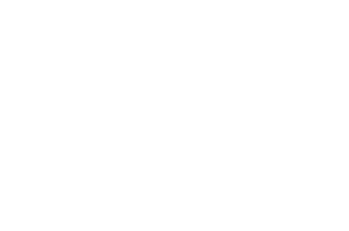

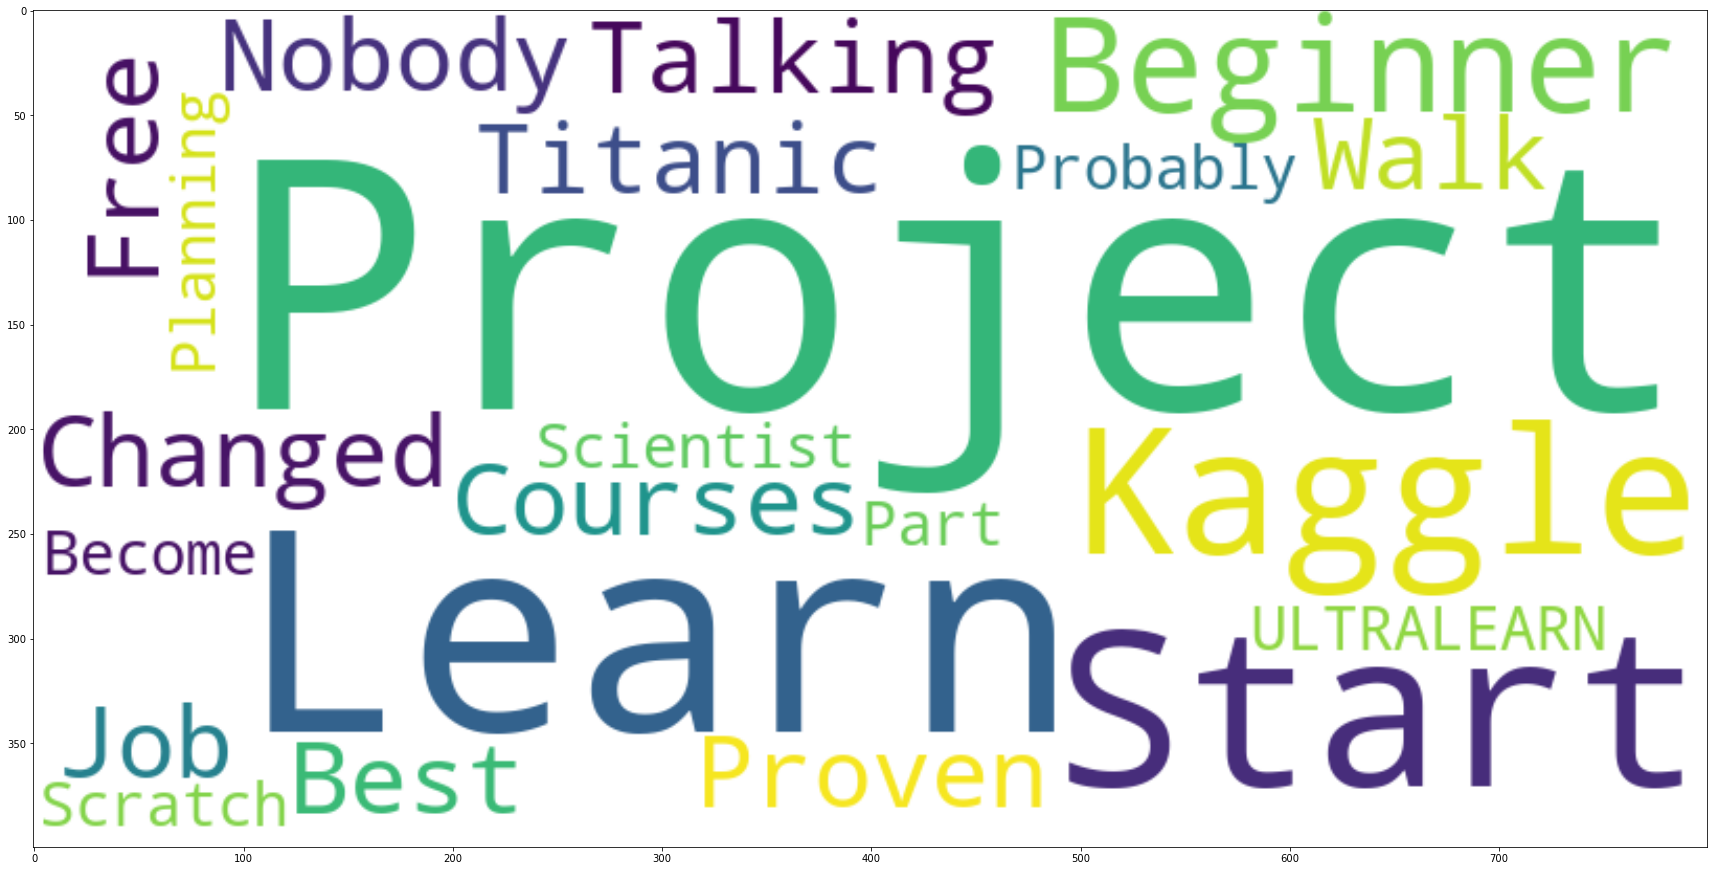

In [412]:
# Python program to generate WordCloud for column BLOOM

# Text of all words in column bloom

text = " ".join(review for review in df_liked['Video title'].astype(str))
print ("There are {} words in the combination of all cells in column Video Title.".format(len(text)))

# Create stopword list:
# remove words that we want to exclude

stopwords = set(STOPWORDS)
stopwords.update(["Data", "Science", "KenJee","science","videos"])
# Generate a word cloud image

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:

plt.axis("off")
plt.figure( figsize=(30,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### Takeaway

- titanic project is one of the most liked videos

In [47]:
df_disliked = new_video_metrics.groupby('Video title')['Dislikes'].agg(['sum']).sort_values(by = 'sum', ascending=False).reset_index().head(10)
fig = px.bar( df_disliked, x='Video title',y = 'sum')

plt_title = "Top 10 Most Disliked Videos"

fig.update_traces(marker_color='green')    
fig.update_layout(
        template="plotly_dark",
        title={
            "text": plt_title,
            "font": {"family": "Rockwell", "size": 25},
            "yanchor": "top",
        }
        
    )
fig.show()

## Shares

In [48]:
df2=new_video_metrics.groupby('Video title')['Shares'].sum().sort_values(ascending=False).head(10).reset_index()

In [49]:
bar_plotter(df2,'Video title','Shares', 'Top 10 Most Shared Videos')

### Wordcloud on Most Shared Videos

There are 611 words in the combination of all Video titles in most shared videos.


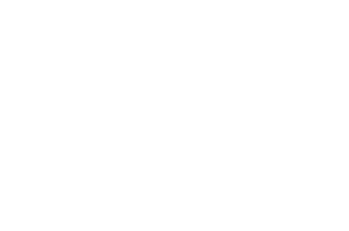

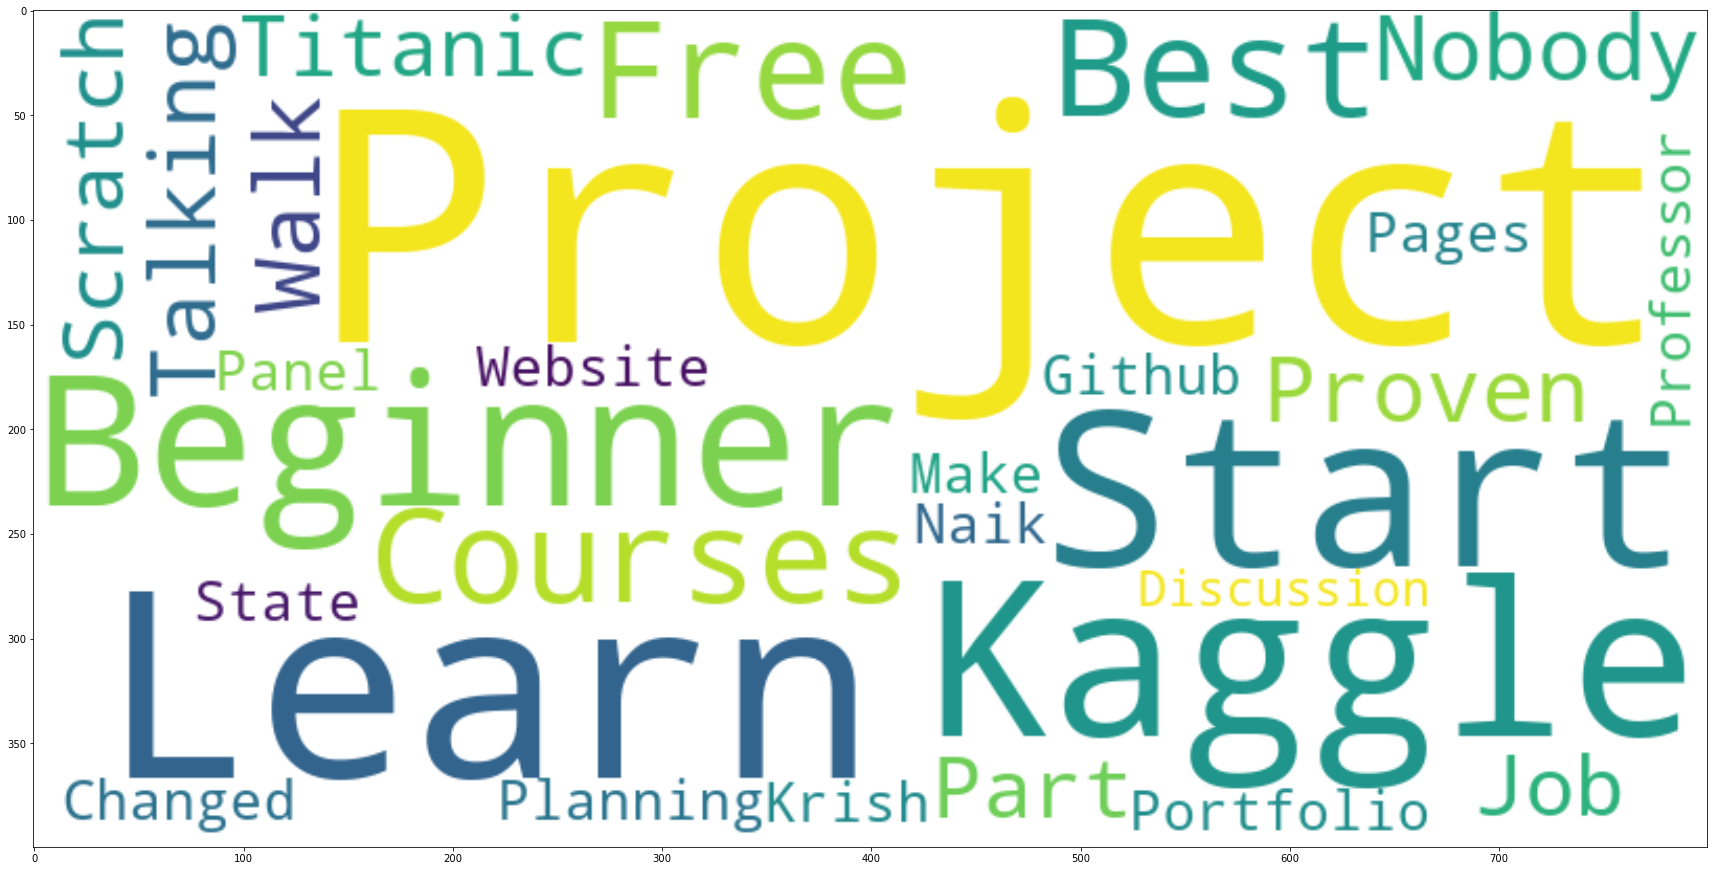

In [414]:
# Python program to generate WordCloud for column BLOOM

# Text of all words in column bloom

text = " ".join(review for review in df2['Video title'].astype(str))
print ("There are {} words in the combination of all Video titles in most shared videos.".format(len(text)))

# Create stopword list:
# remove words that we want to exclude

stopwords = set(STOPWORDS)
stopwords.update(["Data", "Science", "KenJee","science","videos"])
# Generate a word cloud image

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:

plt.axis("off")
plt.figure( figsize=(30,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

#### Takeaways

- People are sharing videos related with the topic of beginner data science projects, github, portfolio,kaggle.
- His video featuring <b>Krish Naik<b> is popular

## Video Title

In [51]:
new_video_metrics['Video title'].nunique()

223

There are 12318 words in all Video Titles.


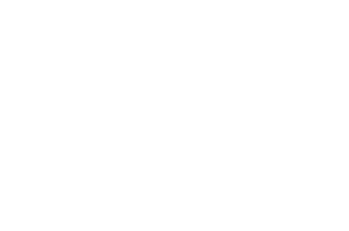

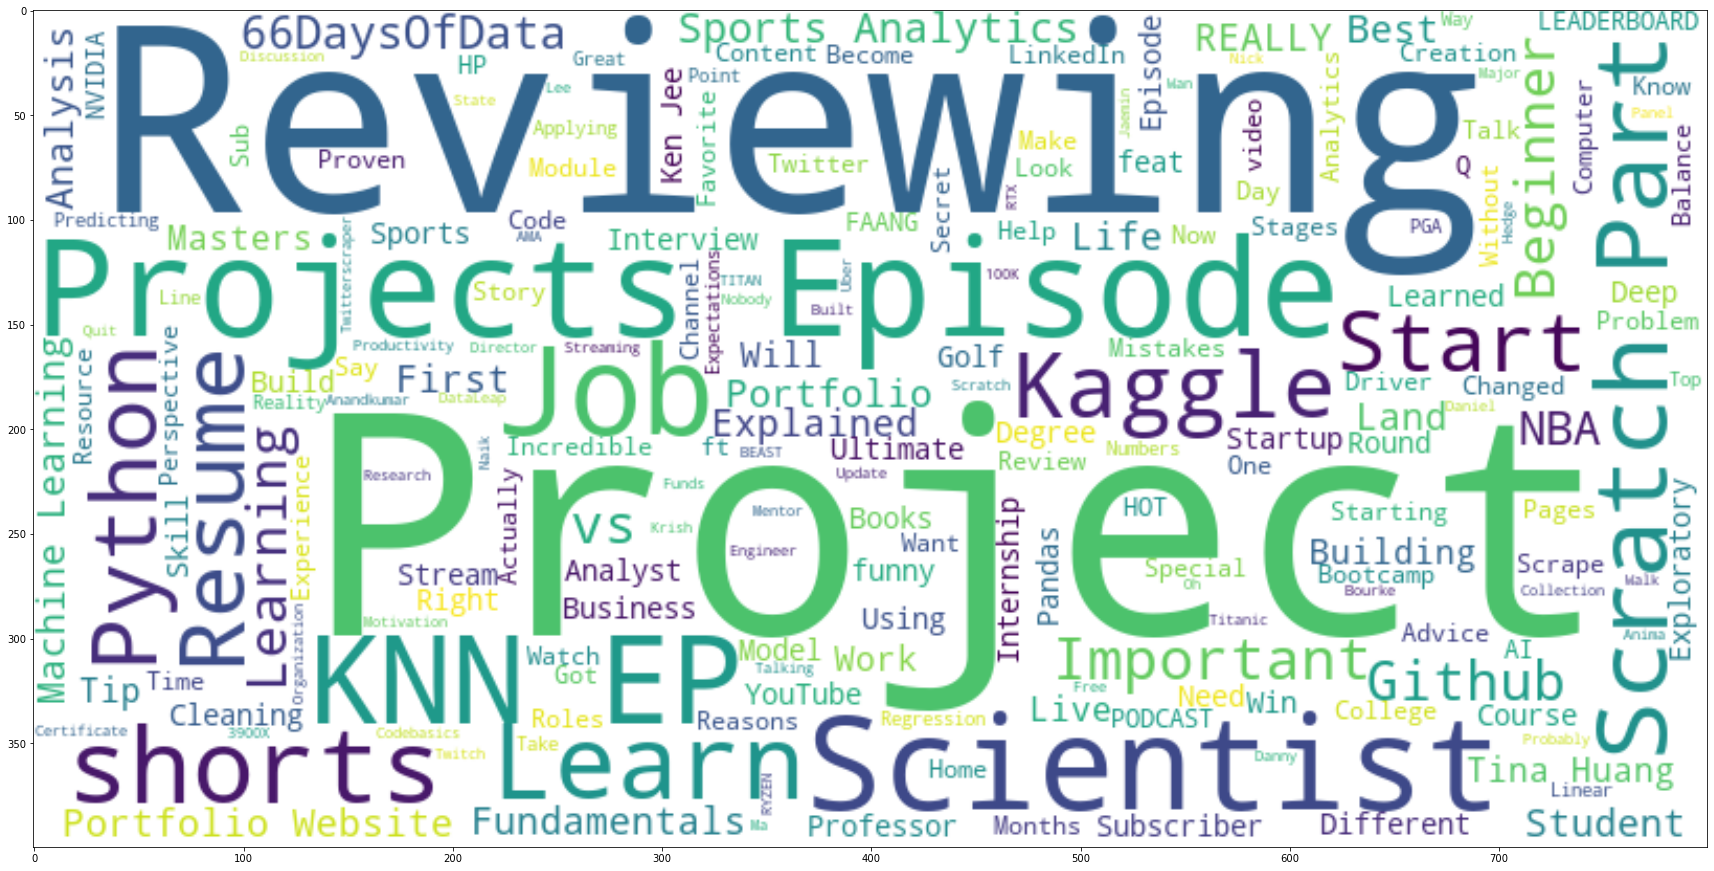

In [416]:
#Python program to generate WordCloud for column BLOOM

# Text of all words in column bloom

text = " ".join(review for review in new_video_metrics['Video title'].astype(str))
print ("There are {} words in all Video Titles.".format(len(text)))

# Create stopword list:
# remove words that we want to exclude

stopwords = set(STOPWORDS)
stopwords.update(["Data", "Science", "KenJee","science","videos"])
# Generate a word cloud image

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:

plt.axis("off")
plt.figure( figsize=(30,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

#### Takeaway

- Kenn has large number videos related to data science and data science projects
- Reviewing portfolios and resumes
- And all the good stuff that you need to get started with Data Science: kaggle, github, python, pandas, jobs,NVIDIA, machine learning, data science fundamentals and more!!!
- 66 days of data & Sport Analytics - popular playlists 

#### Let's us Analyse Title length

In [53]:
new_video_metrics['title length']=new_video_metrics['Video title'].apply(lambda x :len(x))

In [54]:
fig = px.box(x=new_video_metrics['title length'],points='all',)
fig.update_layout(
        template="plotly_dark",
        title={
            "text": 'Title Length',
            "font": {"family": "Rockwell", "size": 25},
            "yanchor": "top",
        }
        
    )
fig.show()

### Title length is generally around 40-70 characters for Kenn's videos

## Subscribers gained and lost  per year

In [55]:
df_gained=new_video_metrics.groupby('Year')['Subscribers gained'].sum().reset_index()

In [56]:
df_lost=new_video_metrics.groupby('Year')['Subscribers lost'].sum().reset_index()

In [57]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2,subplot_titles=('Subscribers Gained','Subscribers Lost'))

fig.add_trace(
    go.Bar(x=df_gained['Year'], y=df_gained['Subscribers gained']),
    row=1, col=1,
)

fig.add_trace(
    go.Bar(x=df_lost['Year'], y=df_lost['Subscribers lost']),
    row=1, col=2
)

fig.update_layout(height=400, width=900,
                  template="plotly_dark",
                  title={
                "text": "Subscribers Gained And Lost By Year",
                "font": {"family": "Rockwell", "size": 25},
                "yanchor": "top",
                    },
                )
fig.show()

### Takeaway

In [58]:
print("Percent decrease in Subscribers Gained from 2020 : " ,round(((105.533-11.825)/105.533)*100) )

Percent decrease in Subscribers Gained from 2020 :  89


In [59]:
print("Percent decrease in Subscribers lost from 2020 : " ,round(((1838-793)/1838)*100) )

Percent decrease in Subscribers lost from 2020 :  57


##### No of subscribers gained has drastically decreased (~89 %) in the year 2021 as compared to 2020.


## Your Estimated Revenue

In [60]:
df_revenue=new_video_metrics.groupby('Year')['Your estimated revenue (USD)'].sum().reset_index()

In [61]:
Total_Revenue=new_video_metrics['Your estimated revenue (USD)'].sum()

In [62]:
Total_Revenue=Total_Revenue.round()

In [63]:
df_revenue['%RevenueShare']= 100*(df_revenue['Your estimated revenue (USD)']/Total_Revenue)

In [64]:
df_revenue=df_revenue.iloc[0:5,:]

In [65]:
fig = px.pie(df_revenue, values='%RevenueShare', names='Year', width=600, height=400)
fig.update_layout(
                  template="plotly_dark",
                  title={
                "text": '%Percent Share in revenue',
                "font": {"family": "Rockwell", "size": 25},
                "yanchor": "top",
                    },
                )
fig.show()

#### 73.5 % of the total revenue till now was generated in 2020

In [66]:
print('%Percent decrease in Revenue from 2020 in 2021:', round(100*((df_revenue.iloc[3,1]-df_revenue.iloc[4,1])/df_revenue.iloc[3,1])))

%Percent decrease in Revenue from 2020 in 2021: 81


#### There was a huge drop in revenue in 2021 as compared to 2020 of about 81%

## RPM(USD) & CPM(USD)

In [67]:
RPM_agg=new_video_metrics.groupby('Video publish time')['RPM(USD)'].sum().reset_index()
CPM_agg=new_video_metrics.groupby('Video publish time')['CPM(USD)'].sum().reset_index()

In [68]:
fig = make_subplots(rows=1, cols=2,shared_yaxes=False, subplot_titles= ('RPM(USD)' ,'CPM(USD)'))
fig1=go.Scatter (x=RPM_agg['Video publish time'],y=RPM_agg['RPM(USD)'])
fig2=go.Scatter (x=CPM_agg['Video publish time'], y=CPM_agg['CPM(USD)'])

fig.add_trace(fig1,row=1,col=1)
fig.add_trace(fig2,row=1, col=2)

fig.update_layout(
                  template="plotly_dark",
                  title={
                "text": 'RPM & CPM Trend' ,
                "font": {"family": "Rockwell", "size": 25},
                "yanchor": "top",
                    },
                )

fig.show()



- RPM (USD) : Revenue Per Mille (RPM) is a metric that represents how much money you have earned per 1,000 video views. Numeric data type as double class.
- CPM (USD) : The estimated gross revenue per thousand ad impressions. Numeric data type as double class.
    

## Impressions

In [69]:
fig = px.box(new_video_metrics, x='Impressions',points='all', notched=True, labels='Video title', range_x=(0, 800000) )


fig.update_traces(quartilemethod="exclusive")
fig.update_layout(
        template="plotly_dark",
        
        title={
            "text": 'Impressions',
            "font": {"family": "Rockwell", "size": 25},
            "yanchor": "top",
        }
        
    )
fig.show()


### On an avg there were 154.187K thumbnails shown to the users per video 

In [70]:
hist_plotter(new_video_metrics,"Average % viewed", "Distribution Average Percentage Viewed for all Videos")

## Impressions Click through rate

In [71]:
hist_plotter(new_video_metrics,"Impressions ctr(%)", "Distribution of Impressions Click Through Rate(%) for all Videos")

# Aggregated_Metrics_By_Country_And_Subscriber_Status

In [72]:
show(
    country_metrics,
    columnDefs=[{"width": "120px", "targets": "_all"}],
    tags="<caption>Aggregate Data By Video</caption>"
)

In [73]:
country_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55292 entries, 0 to 55291
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Video Title                 55292 non-null  object 
 1   External Video ID           55292 non-null  object 
 2   Video Length                55292 non-null  int64  
 3   Thumbnail link              55292 non-null  object 
 4   Country Code                54906 non-null  object 
 5   Is Subscribed               55292 non-null  bool   
 6   Views                       55292 non-null  int64  
 7   Video Likes Added           55292 non-null  int64  
 8   Video Dislikes Added        55292 non-null  int64  
 9   Video Likes Removed         55292 non-null  int64  
 10  User Subscriptions Added    55292 non-null  int64  
 11  User Subscriptions Removed  55292 non-null  int64  
 12  Average View Percentage     53854 non-null  float64
 13  Average Watch Time          538

In [74]:
print("No. of Duplicate rows in dataset :",country_metrics.duplicated().sum())

No. of Duplicate rows in dataset : 15


In [75]:
country_metrics.drop_duplicates(keep=False, inplace=True)

In [76]:
print("No. of Duplicate rows in dataset :",country_metrics.duplicated().sum())

No. of Duplicate rows in dataset : 0


In [77]:
country_metrics.shape

(55262, 15)

In [78]:
country_metrics.isnull().sum()

Video Title                      0
External Video ID                0
Video Length                     0
Thumbnail link                   0
Country Code                   356
Is Subscribed                    0
Views                            0
Video Likes Added                0
Video Dislikes Added             0
Video Likes Removed              0
User Subscriptions Added         0
User Subscriptions Removed       0
Average View Percentage       1408
Average Watch Time            1408
User Comments Added              0
dtype: int64

#### Converting Video Length and Average Watch Time in minutes

In [79]:
country_metrics['Video Length'] =round(country_metrics['Video Length']/60,2)
country_metrics['Average Watch Time'] = round(country_metrics['Average Watch Time']/60,2)

## Subscribed

In [80]:
new_df=country_metrics['Is Subscribed'].value_counts().reset_index().rename(columns={"index":"Subscribed","Is Subscribed":"Counts"})

In [81]:
new_df['% Subscribed']=round((new_df['Counts']/new_df['Counts'].sum())*100)

In [82]:
fig = px.pie(new_df, values='% Subscribed', names='Subscribed',width=400, height=400)
fig.update_layout(
                  template="plotly_dark",
                  title={
                "text": '% of Viewers Subscribed',
                "font": {"family": "Rockwell", "size": 25},
                "yanchor": "top",
                    },
                )
fig.show()

### 52% of Kenn's Viewers haven't subscribed to his channel

## Country Code

In [83]:
country_metrics['Country Code'].nunique()

233

In [84]:
import country_converter as co
country=country_metrics.groupby(["Country Code"])["Views"].sum().sort_values(ascending=False).reset_index().head(10)

In [85]:
country["Country_name"]=country["Country Code"].apply(lambda x:co.convert(names=x,to="name_short",not_found=None))

In [86]:
bar_plotter(country,'Country_name','Views', "Top 5 Countries who watch Kenn's channel")

In [87]:
fig = go.Figure(data=go.Choropleth(
    locations=country['Country_name'], # Spatial coordinates
    z = country['Views'],# Data to be color-coded
    locationmode = 'country names', # set of locations match entries in `locations`
    colorscale = 'blues',
    colorbar_title = "Views",
))
fig.update_layout(
    template="plotly_dark",
    title={
                "text": 'Total Views By Country',
                "font": {"family": "Rockwell", "size": 25},
                "yanchor": "top",
                    },
   
)

fig.show()

### USA and India are the top contributors 

- USA     1.35M views
- India   1.15M Views

## Performance of Top 10 Videos 

In [88]:
df=country_metrics.groupby('Video Title').agg(

    Total_views=('Views','sum'),
    Video_length=('Video Length','mean'),
    Avg_Watch_Time=('Average Watch Time','mean'),
    Likes=('Video Likes Added', 'sum'),
    Dislikes=('Video Dislikes Added','sum'),
    Avg_View_Percentage=('Average View Percentage','mean')
    
    ).reset_index()

In [89]:
top10=df.sort_values('Total_views', ascending=False).head(10)

In [90]:
top10['Avg_View_Percentage']=top10['Avg_View_Percentage']*100

In [91]:
top10['Likes Vs Dislikes %']=round((top10['Likes']-top10['Dislikes'])/(top10['Likes']+top10['Dislikes'])*100,2)

In [92]:
top10['Avg Watch Time Vs Video Length Ratio %']=round(top10['Avg_Watch_Time']/(top10['Video_length'])*100, 2)

In [93]:
top10.style.background_gradient(cmap='Reds')

## Takeaways

- Most popular videos are the ones concerning data science beginners
- Subscribers generally like videos discussing about projects and how can they enter Data science 
- People really listen to videos when Kenn has a title that scares aspiring data scientists- 'Why I Quit Data Science' & '3 Reasons You Should NOT Become a Data Scientist

# Video Performance

In [94]:

show(
    video_performance,
    columnDefs=[{"width": "120px", "targets": "_all"}],
    tags="<caption>Video Performance over Time</caption>"
)

In [95]:
print('No of rows:', video_performance.shape[0])
print('No of cols:', video_performance.shape[1])

No of rows: 111857
No of cols: 14


In [96]:
print("No of duplicate rows:",video_performance.duplicated().sum())

No of duplicate rows: 0


In [97]:
print("No of null values: \n",video_performance.isnull().sum())

No of null values: 
 Date                             0
Video Title                      0
External Video ID                0
Video Length                     0
Thumbnail link                   0
Views                            0
Video Likes Added                0
Video Dislikes Added             0
Video Likes Removed              0
User Subscriptions Added         0
User Subscriptions Removed       0
Average View Percentage       1347
Average Watch Time            1347
User Comments Added              0
dtype: int64


In [98]:
video_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111857 entries, 0 to 111856
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Date                        111857 non-null  object 
 1   Video Title                 111857 non-null  object 
 2   External Video ID           111857 non-null  object 
 3   Video Length                111857 non-null  int64  
 4   Thumbnail link              111857 non-null  object 
 5   Views                       111857 non-null  int64  
 6   Video Likes Added           111857 non-null  int64  
 7   Video Dislikes Added        111857 non-null  int64  
 8   Video Likes Removed         111857 non-null  int64  
 9   User Subscriptions Added    111857 non-null  int64  
 10  User Subscriptions Removed  111857 non-null  int64  
 11  Average View Percentage     110510 non-null  float64
 12  Average Watch Time          110510 non-null  float64
 13  User Comments 

In [99]:
#Convert Date data type to datetime
video_performance['Date']=pd.to_datetime(video_performance['Date'])

In [100]:
video_performance['Year'] = video_performance['Date'].dt.year
video_performance['Month'] = video_performance['Date'].dt.month_name()
video_performance['Day'] = video_performance['Date'].dt.day


In [101]:
show(
    video_performance,
    columnDefs=[{"width": "120px", "targets": "_all"}],
    tags="<caption>Video Performance over Time</caption>"
)

In [102]:
df_vidperf=video_performance.groupby('Video Title').agg(

    SubscriptionsAdded=('User Subscriptions Added','sum'),
    SubscriptionsLost=('User Subscriptions Removed','sum'),
    
    
    ).reset_index()

In [103]:
temp1=df_vidperf.sort_values('SubscriptionsAdded', ascending=False).head(5)

In [104]:
temp2=df_vidperf.sort_values('SubscriptionsLost', ascending=False).head(5)

In [105]:
fig = make_subplots(rows=1, cols=2,subplot_titles=('Subscribers Added','Subscribers Lost'))

fig.add_trace(
    go.Bar(x=temp1['Video Title'], y=temp1['SubscriptionsAdded']),
    row=1, col=1,
)

fig.add_trace(
    go.Bar(x=temp2['Video Title'], y=temp2['SubscriptionsLost']),
    row=1, col=2
)

fig.update_layout(height=500, width=900,
                  template="plotly_dark",
                  title={
                "text": "Subscribers Added And Lost By Video Title",
                "font": {"family": "Rockwell", "size": 25},
                "yanchor": "top",
                    },
                )
fig.show()

In [106]:
dt=video_performance.groupby('Date')['Views'].sum().reset_index()

In [107]:
fig = px.line(dt, x='Date', y='Views')
plt_title = "Channel Views by Date"

fig.update_traces(line=dict(
                        color='rgb(255, 14, 14)'))   
fig.update_layout(
        template="plotly_dark",
        title={
            "text": plt_title,
            "font": {"family": "Rockwell", "size": 25},
            "yanchor": "top",
        }
        
    )
fig.show()

In [108]:
dt.sort_values('Views', ascending=False)

Date   Views
929 2020-06-05  128128
904 2020-05-11   52879
905 2020-05-12   46685
917 2020-05-24   37468
918 2020-05-25   36538
..         ...     ...
6   2017-11-24       1
7   2017-11-25       1
9   2017-11-27       1
33  2017-12-22       1
0   2017-11-01       1

[1523 rows x 2 columns]

#### There was a huge traffic on Jun 5th 2020, May 11th 2020, May 12th 2020, May 24th 2020 and May 25th 2020 --> Larger traffic than normal trend

In [109]:
#new_video_metrics[new_video_metrics["Video publish time"] == ('2020-06-05')]['Video title']
#new_video_metrics[new_video_metrics["Video publish time"]=='2020-05-11']['Video title']
#new_video_metrics[new_video_metrics["Video publish time"]=='2020-05-25']['Video title']

#### On  May 11th 2020, 'Reviewing Your Data Science Projects - Episode 3 (Student Portfolio)' video was published

#### On May 25th 2020, 'Reviewing Your Data Science Projects - Episode 5 (Very Detailed Project)' video was published

#### On Jun 5th 2020, 'The State of Data Science with Krish Naik & The Data Professor [Panel Discussion]' video was published

- Traffic started increasing from May 2020 --> Lockdown starting period
- Traffic was highest on channel when Kenn did a colab with 'Krish Naik' and 'The Data Professor' --> Two big youtubers in Data Science field ---> probably the traffic was huge because it combined viewers from all three youtubers Kenn, Krish and the Data Professor
- Traffic was good between May 2020 and Jun 2020

## Subscribers Lost and Gained By date

In [110]:
df_subs=video_performance.groupby('Date').agg(

    SubscriptionsAdded=('User Subscriptions Added','sum'),
    SubscriptionsLost=('User Subscriptions Removed','sum'),
    
    
    ).reset_index()

In [111]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_subs['Date'], y=df_subs['SubscriptionsAdded'],
                    mode='lines',
                    name='SubsAdded'))
fig.add_trace(go.Scatter(x=df_subs['Date'], y=df_subs['SubscriptionsLost'],
                    mode='lines',
                    name='SubsLost'))
fig.update_layout(
        template="plotly_dark",
        title={
            "text": 'Subscriptions Gained and Lost Per Day',
            "font": {"family": "Rockwell", "size": 25},
            "yanchor": "top",
        }
        
    )

fig.show()

# Comments

In [113]:
show(
    comments,
    columnDefs=[{"width": "120px", "targets": "_all"}],
    tags="<caption>Aggregated comments data</caption>"
)

In [114]:
print('No of rows:', comments.shape[0])
print('No of cols:', comments.shape[1])

No of rows: 10240
No of cols: 7


In [186]:
print("No of unique comments :", comments['Comment_ID'].nunique())
print("No of users who commented on Kenn's Videos :", comments['user_ID'].nunique())
print("No of videos that got comments :", comments['VidId'].nunique())
print("No of duplicated rows :", comments.duplicated().sum())
print("Null Rows:\n ", comments.isnull().sum())

No of unique comments : 10240
No of users who commented on Kenn's Videos : 5875
No of videos that got comments : 222
No of duplicated rows : 0
Null Rows:
  Comments       1
Comment_ID     0
Reply_Count    0
Like_Count     0
Date           0
VidId          0
user_ID        0
dtype: int64


In [194]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Comments     10239 non-null  object
 1   Comment_ID   10240 non-null  object
 2   Reply_Count  10240 non-null  int64 
 3   Like_Count   10240 non-null  int64 
 4   Date         10240 non-null  object
 5   VidId        10240 non-null  object
 6   user_ID      10240 non-null  object
dtypes: int64(2), object(5)
memory usage: 560.1+ KB


In [196]:
comments['Date']= pd.to_datetime(comments['Date'])
comments['Date']

0       2022-01-22 08:13:29+00:00
1       2022-01-22 01:09:46+00:00
2       2022-01-21 23:59:05+00:00
3       2022-01-21 23:00:37+00:00
4       2022-01-21 20:24:20+00:00
                   ...           
10235   2018-07-06 07:08:39+00:00
10236   2018-05-15 00:01:12+00:00
10237   2018-05-04 20:58:54+00:00
10238   2018-02-20 16:46:19+00:00
10239   2017-12-03 18:52:35+00:00
Name: Date, Length: 10240, dtype: datetime64[ns, UTC]

In [225]:
comments['Year'] = comments['Date'].dt.year
comments['Month'] = comments['Date'].dt.month_name()
comments['Day'] = comments['Date'].dt.day
comments['DayOfWeek'] = comments['Date'].dt.day_name()
comments['Time']=comments['Date'].dt.hour
comments['DateOnly']=comments['Date'].dt.date

In [307]:
byYear=comments.groupby('Year')['Comments'].count().reset_index()
byDateOnly=comments.groupby('DateOnly')['Comments'].count().reset_index().sort_values('Comments',ascending=False).head(20)
byTime=comments.groupby('Time')['Comments'].count().reset_index()
byDayOfWeek=comments.groupby('DayOfWeek')['Comments'].count().reset_index()
byDay=comments.groupby('Day')['Comments'].count().reset_index()
byMonth=comments.groupby('Month')['Comments'].count().reset_index()

In [308]:
fig = make_subplots(rows=2, cols=2,subplot_titles=('Comments by Year','Comments by Hour of the day', 'Comments by DayOfWeek',
                                                   'Comments by Month'))

fig.add_trace(
    go.Bar(x=byYear['Year'], y=byYear['Comments']),
    row=1, col=1,
)

fig.add_trace(
    go.Bar(x=byTime['Time'], y=byTime['Comments']),
    row=1, col=2,
)

fig.add_trace(
    go.Bar(x=byDayOfWeek['DayOfWeek'], y=byDayOfWeek['Comments']),
    row=2, col=1,
)


fig.add_trace(
    go.Bar(x=byMonth['Month'], y=byMonth['Comments']),
   row=2, col=2,
)



fig.update_layout(height=1000, width=900,
                  template="plotly_dark",
                  title={
                "text": "Comments Analysis",
                "font": {"family": "Rockwell", "size": 25},
                "yanchor": "top",
                    },
                )
fig.show()

### Takeaways

#### - Seems like Ken receives most of the comments on his videos on Fridays and during 1pm to 5pm.
#### -  We can also see that Ken has received most of the comments in May over years and from May to August seems to be a timeperiod during which he receives comments mostly ---> probably he stays more active during this period
#### - In 2020 he received almost 2200 more comments on his channel than 2021, and greater than any year, maybe he was more active, posting more videos during 2020.
#### - In 2022, until now he has received almost ~270 comments.

In [309]:
byDateOnly

DateOnly  Comments
339  2020-07-24       102
375  2020-08-29        88
267  2020-05-13        77
265  2020-05-11        73
290  2020-06-05        72
542  2021-02-12        67
475  2020-12-07        66
266  2020-05-12        64
297  2020-06-12        63
269  2020-05-15        60
556  2021-02-26        57
487  2020-12-19        57
412  2020-10-05        55
367  2020-08-21        51
342  2020-07-27        50
403  2020-09-26        49
276  2020-05-22        48
478  2020-12-10        48
866  2022-01-03        48
325  2020-07-10        48

In [311]:
fig = px.bar(byDateOnly, x='Comments',y ='DateOnly',  height=600,)

plt_title = "Top 20 Dates With Most Comments Received"

fig.update_traces(marker_color='darkred')    
fig.update_layout(
        template="plotly_dark",
        title={
            "text": plt_title,
            "font": {"family": "Rockwell", "size": 25},
            "yanchor": "top",
            
        },
        yaxis={'type': 'category',
              'categoryorder': 'total ascending',
              }
    
        
    )
fig.show()

##  Videos with most comments

In [174]:
most_commented=comments.groupby('VidId')['Comments'].count().reset_index().sort_values('Comments', ascending= False).head(10)


In [175]:
l1=most_commented['VidId'].tolist()
l1

['4OZip0cgOho',
 'Ip50cXvpWY4',
 'Q9FjwzKFPuM',
 '41Clrh6nv1s',
 '8igH8qZafpo',
 'GmW4F6MHqqs',
 'uXLnbdHMf8w',
 'sHRq-LshG3U',
 'I3FBJdiExcg',
 'SVtRsDhHlDk']

In [170]:
# video_performance[video_performance['External Video ID'].isin(l1)]['Video Title'].unique()

In [176]:
print(video_performance[video_performance['External Video ID']=='4OZip0cgOho']['Video Title'].unique())
print(video_performance[video_performance['External Video ID']=='Ip50cXvpWY4']['Video Title'].unique())
print(video_performance[video_performance['External Video ID']=='Q9FjwzKFPuM']['Video Title'].unique())
print(video_performance[video_performance['External Video ID']=='41Clrh6nv1s']['Video Title'].unique())
print(video_performance[video_performance['External Video ID']=='8igH8qZafpo']['Video Title'].unique())
print(video_performance[video_performance['External Video ID']=='GmW4F6MHqqs']['Video Title'].unique())
print(video_performance[video_performance['External Video ID']=='uXLnbdHMf8w']['Video Title'].unique())
print(video_performance[video_performance['External Video ID']=='sHRq-LshG3U']['Video Title'].unique())
print(video_performance[video_performance['External Video ID']=='I3FBJdiExcg']['Video Title'].unique())
print(video_performance[video_performance['External Video ID']=='SVtRsDhHlDk']['Video Title'].unique())

['How I Would Learn Data Science (If I Had to Start Over)']
['The Best Free Data Science Courses Nobody is Talking About']
['Data Science Certificate vs Bootcamp vs Masters Degree']
['How I Would Learn Data Science in 2021 (What Has Changed?)']
['3 Proven Data Science Projects for Beginners (Kaggle)']
['Data Science Project from Scratch - Part 2 (Data Collection)']
["Why I'm Starting Data Science Over Again."]
["Why You Probably Won't Become a Data Scientist"]
['Beginner Kaggle Data Science Project Walk-Through (Titanic)']
['Why I Quit Data Science']


In [177]:
most_commented['Video Title']=['How I Would Learn Data Science (If I Had to Start Over)','The Best Free Data Science Courses Nobody is Talking About',
                              'Data Science Certificate vs Bootcamp vs Masters Degree','How I Would Learn Data Science in 2021 (What Has Changed?)',
                              '3 Proven Data Science Projects for Beginners (Kaggle)','Data Science Project from Scratch - Part 2 (Data Collection)',
                               "Why I'm Starting Data Science Over Again", "Why You Probably Won't Become a Data Scientist",
                               'Beginner Kaggle Data Science Project Walk-Through (Titanic)', 'Why I Quit Data Science'
                              ]

In [189]:
most_commented.style.background_gradient(cmap='Reds')

## Comments with Most Likes

In [325]:
mostLikedComment=comments.groupby('Comments')['Like_Count'].sum().reset_index().sort_values('Like_Count',ascending= False).head(10)

In [331]:
mostLikedComment.style.background_gradient(cmap='Reds')

## Comments with Most replies

In [333]:
mostReplies=comments.groupby('Comments')['Reply_Count'].sum().reset_index().sort_values('Reply_Count',ascending= False).head(10)

In [335]:
mostReplies.style.background_gradient()

### Takeaways

Number one most liked comment - <b>'Don’t sugarcoat things, Ken. Just tell me I’m not smart enough.' </b>
--> Interestingly weird ;)

<b> Despite of all these .. and No matter how many difficulties will come on the way... I'll never give up on becoming data scientist.❤</b> -->Very positive comment

Another good one with most replies --><b> Mistake #1: Plugging your USBs into Papayas How to Solve This: Plug your USBs into Bananas It's basic stuff, but some people still mess this up </b>

### Wordcloud on Comments

There are 1841938 words in the combination of all cells in column Comments.


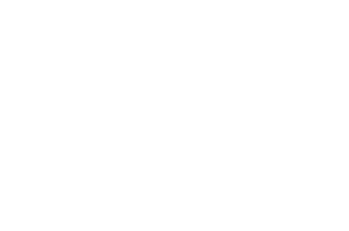

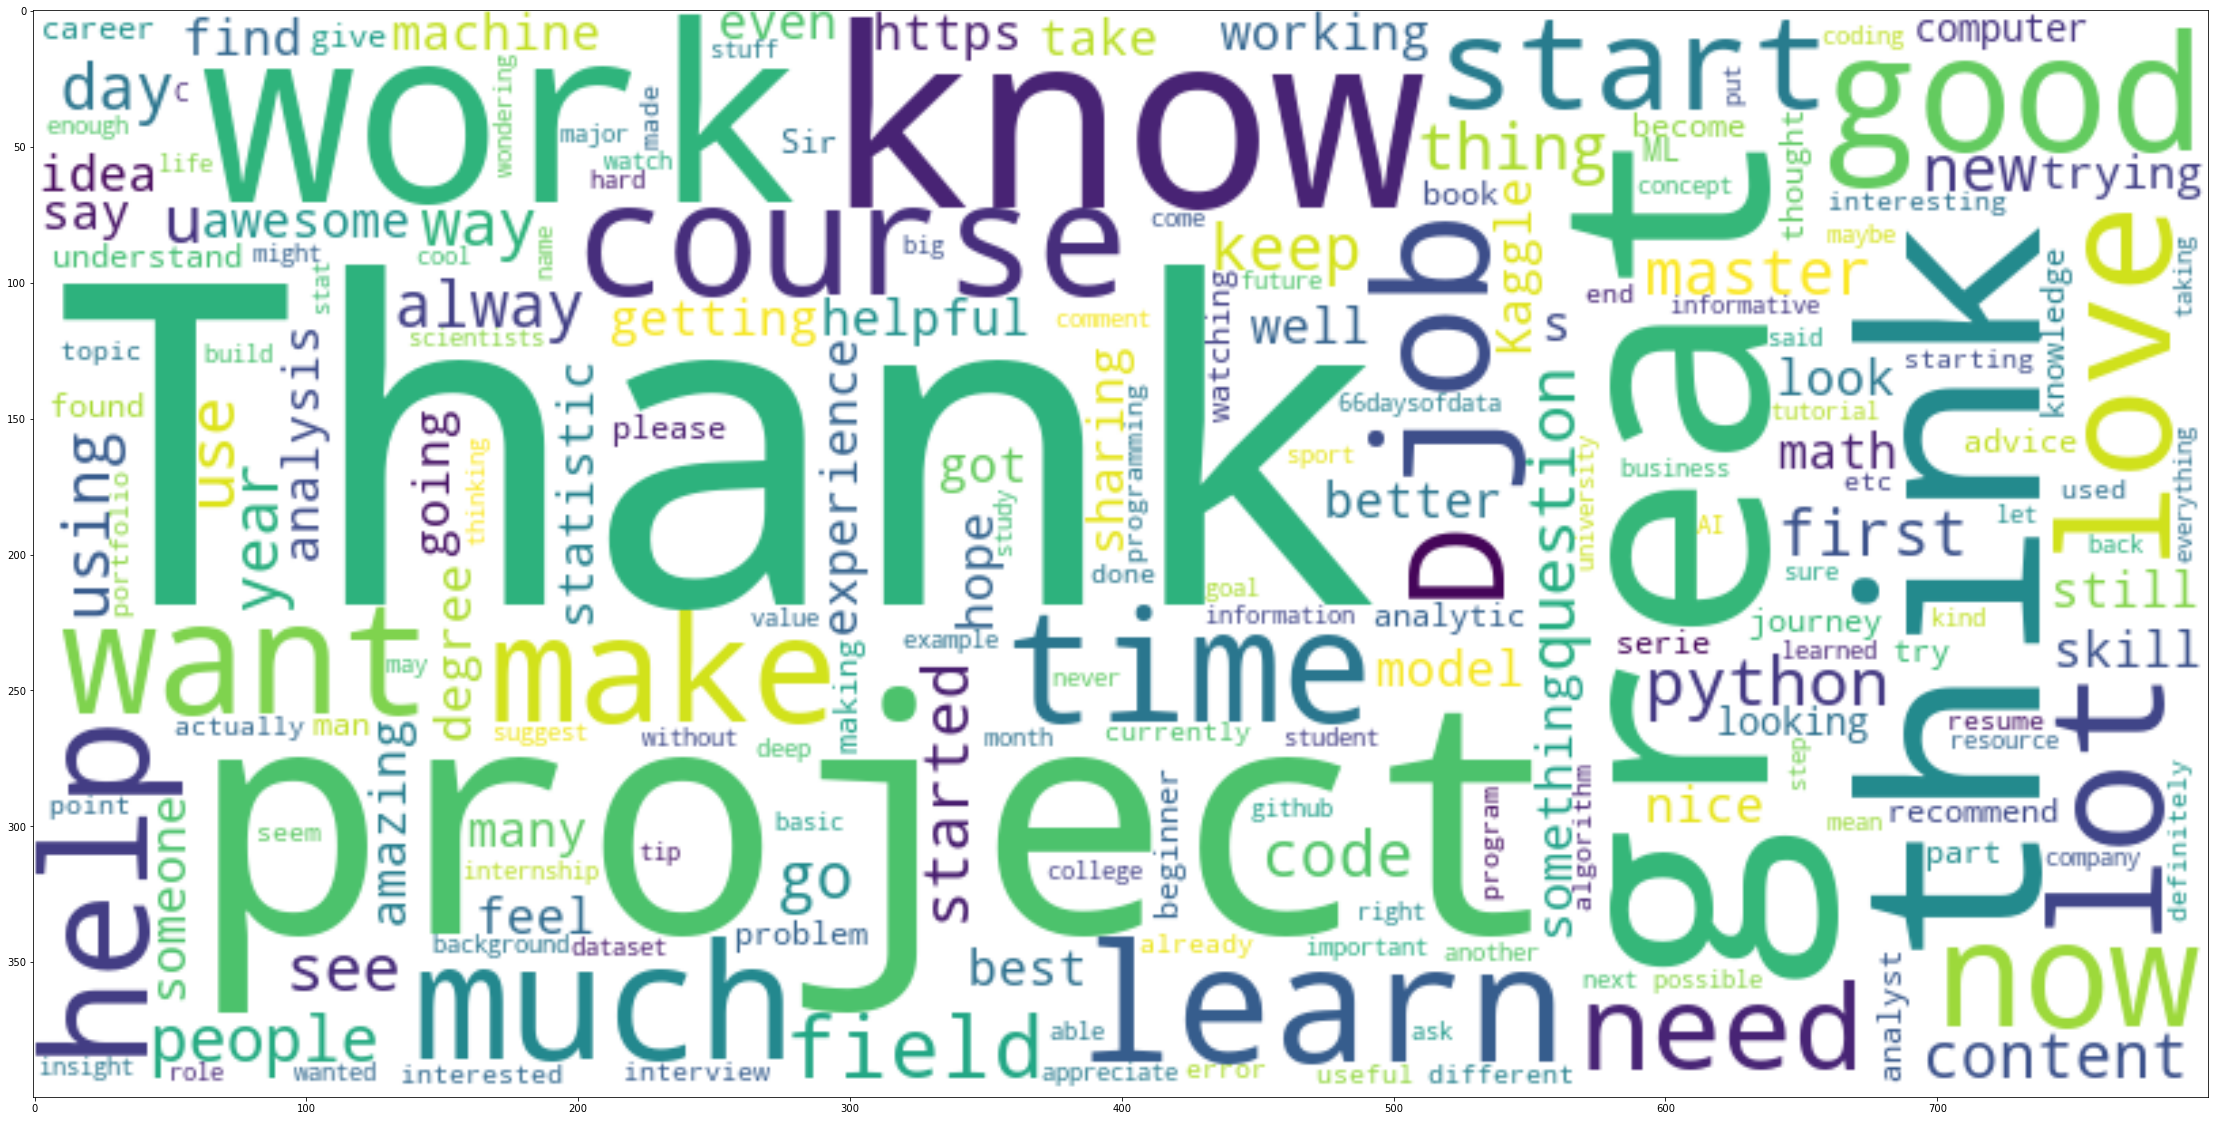

In [424]:
# Python program to generate WordCloud for column BLOOM

# Text of all words in column bloom

text = " ".join(review for review in comments.Comments.astype(str))
print ("There are {} words in the combination of all cells in column Comments.".format(len(text)))

# Create stopword list:
# remove words that we want to exclude

stopwords = set(STOPWORDS)
stopwords.update(["Ken", "Jee","one","Data", "Science","really", "KenJee","science","videos","channel","learning","hi","hello","Hey",'video','youtube', "will","scientist","m","I"])
# Generate a word cloud image

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:

plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

- Most common word- <b>Thank </b>, we can also see words like good, great,best,job, love, helpful, awesome, which are indicative of positive sentiments which means Ken is doing the right job
- A lot of <b>project</b> related comments are received
- Beginner related comments that include words like- interview, code, first, start, learn occupy great sapce in comment section ----> that's a thing because viewers generally view beginner related content more on Kenn's channel
- In skills, viewers are talking about Python, github, ML, Math
- People also comment about <b>Kaggle</b>

## Sentiment Analysis on Comments

In [427]:
!pip install textblob

In [431]:
from textblob import TextBlob
import nltk

In [433]:
comments['polarity'] = comments['Comments'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

In [435]:
comments['pol_cat']  = 0

In [436]:
comments['pol_cat'][comments.polarity > 0] = 1
comments['pol_cat'][comments.polarity <= 0] = -1

In [444]:
com_pol=comments['pol_cat'].value_counts().reset_index()

In [447]:
com_pol['Percent']=100*(com_pol['pol_cat']/com_pol['pol_cat'].sum())


In [451]:
com_pol['Percent']=com_pol['Percent'].round()

In [460]:
fig = px.pie(com_pol, values='Percent', names=["Positive Comments","Negative Comments"],width=600, height=500)
fig.update_layout(
                  template="plotly_dark",
                  title={
                "text":"% share of Positive and Negative Comments",
                "font": {"family": "Rockwell", "size": 25},
                "yanchor": "top",
                    },
                )
fig.show()